### 1) 선형회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # 시각화하기 위한

In [2]:
df = pd.read_csv('./data/LinearRegressionData.csv')
df

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [3]:
df.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [5]:
X = df.iloc[:, :-1] # 처음부터, 마지막
X, X.shape #X 는 원인


(    hour
 0    0.5
 1    1.2
 2    1.8
 3    2.4
 4    2.6
 5    3.2
 6    3.9
 7    4.4
 8    4.5
 9    5.0
 10   5.3
 11   5.8
 12   6.0
 13   6.1
 14   6.2
 15   6.9
 16   7.2
 17   8.4
 18   8.6
 19  10.0,
 (20, 1))

In [7]:
X = df.iloc[:, :-1].values #독립변수(원인)
y = df.iloc[:, -1].values #종속변수(결과)
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [8]:
from sklearn.linear_model import LinearRegression #선형회귀 모델 생성
reg = LinearRegression() # 객체생성
reg.fit(X, y) #학습할 데이터(X, y) 결과를 reg에 담음

LinearRegression()

In [9]:
y_pred = reg.predict(X) #X를 가지고 결과를 예측해서 y_pred에 넣기
y_pred #예측한 값

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [10]:
y #원래 값

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100], dtype=int64)

In [11]:
X

array([[ 0.5],
       [ 1.2],
       [ 1.8],
       [ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.9],
       [ 4.4],
       [ 4.5],
       [ 5. ],
       [ 5.3],
       [ 5.8],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.9],
       [ 7.2],
       [ 8.4],
       [ 8.6],
       [10. ]])

### 2) 선형회귀 시각화

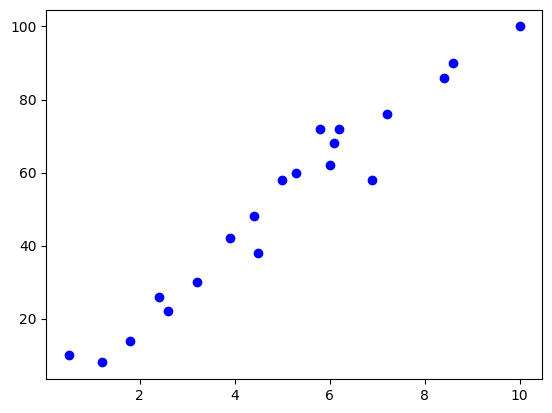

In [12]:
plt.scatter(X, y, color='blue') #plt (그래프생성) , scatter(점선 분포도)
plt.show()

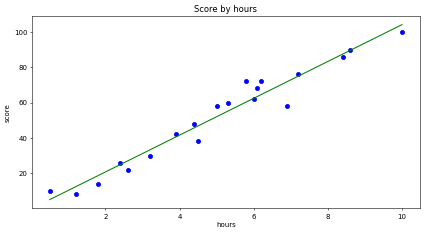

In [14]:
plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X, y, color='blue') # 전체 데이터 20개
plt.plot(X, y_pred, color='green') #plot(직선그래프)
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [17]:
reg.predict([[9], [8], [5]]) #시간 (배열이라 [[안에 예측시간]])

array([93.77478776, 83.33109082, 52.        ])

In [19]:
m = reg.coef_ #기울기 값
m

array([10.44369694])

In [20]:
b = reg.intercept_
b

-0.218484702867201

In [21]:
y = m * 9 + b #직선 공식
y

array([93.77478776])

### 3) 데이터 세트 분리

In [23]:
df = pd.read_csv('./data/LinearRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 값을 분리

In [25]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [27]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [28]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [29]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

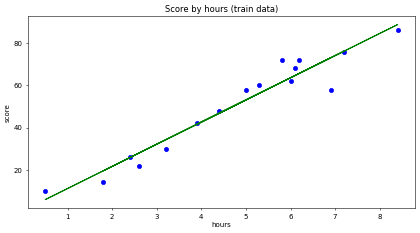

In [31]:
y_pred = reg.predict(X_train) # 예측값
plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X_train, y_train, color='blue') # 데이터 16개를 가지고
plt.plot(X_train, y_pred, color='green')
plt.title('Score by hours (train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

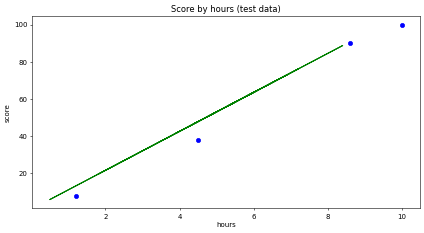

In [32]:
plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X_test, y_test, color='blue') # 테스트값이
plt.plot(X_train, y_pred, color='green') # train값과 얼마나 근접한지
plt.title('Score by hours (test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [33]:
reg.coef_ #train 세트를 가지고 기울기

array([10.49161294])

In [34]:
reg.intercept_

0.6115562905169369

In [35]:
reg.score(X_train, y_train) # train세트를 가지고 평가점수 (1점이 만점)

0.9356663661221668

In [36]:
reg.score(X_test, y_test)

0.9727616474310156

### 4) 경사하강법

In [37]:
X_train, y_train

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64))

In [38]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor() #객체생성
sr.fit(X_train, y_train)

SGDRegressor()

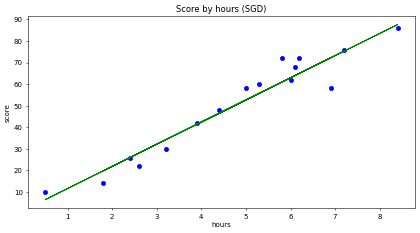

In [39]:
y_pred = sr.predict(X_train) # 예측값 (X_train을 가지고 예측)
plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X_train, y_train, color='blue') # 데이터 16개를 가지고 (실제값)
plt.plot(X_train, y_pred, color='green') # 예측값
plt.title('Score by hours (SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [40]:
sr.score(X_train, y_train) # train 세트로 점수구하기

0.9350456356765143

In [41]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1) # 반복횟수 지정, eta0 고폭? 0.001을 반복 1000번/ verbose는 실행과정
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

SGDRegressor(eta0=0.001, random_state=0, verbose=1)

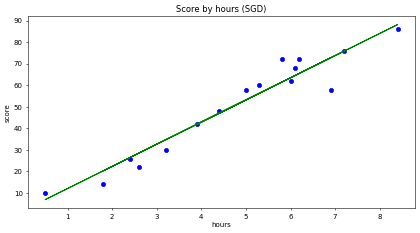

In [42]:
y_pred = sr.predict(X_train) # 예측값 (X_train을 가지고 예측)
plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X_train, y_train, color='blue') # 데이터 16개를 가지고 (실제값)
plt.plot(X_train, y_pred, color='green') # 예측값
plt.title('Score by hours (SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [43]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter=10, eta0=0.001, random_state=0, verbose=1) # 반복횟수 지정, eta0 고폭 0.001을 반복 10번/ verbose는 실행과정
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 2.40, NNZs: 1, Bias: 0.442470, T: 16, Avg. loss: 1181.034371
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.84, NNZs: 1, Bias: 0.697455, T: 32, Avg. loss: 754.011321
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.89, NNZs: 1, Bias: 0.881472, T: 48, Avg. loss: 520.842928
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.70, NNZs: 1, Bias: 1.023556, T: 64, Avg. loss: 374.527388
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.34, NNZs: 1, Bias: 1.137258, T: 80, Avg. loss: 277.717040
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 6.88, NNZs: 1, Bias: 1.230635, T: 96, Avg. loss: 210.603548
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.32, NNZs: 1, Bias: 1.308149, T: 112, Avg. loss: 162.433366
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.69, NNZs: 1, Bias: 1.372847, T: 128, Avg. loss: 127.468199
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.01, NNZs: 1, Bias: 1.427757, T: 144, Avg. loss: 101.814505
Total training time: 0.

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.001, max_iter=10, random_state=0, verbose=1)

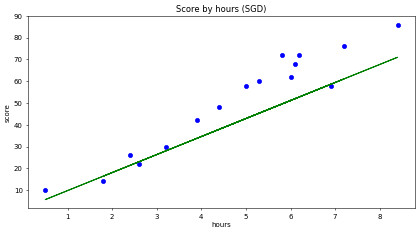

In [44]:
y_pred = sr.predict(X_train) # 예측값 (X_train을 가지고 예측)
plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X_train, y_train, color='blue') # 데이터 16개를 가지고 (실제값)
plt.plot(X_train, y_pred, color='green') # 예측값
plt.title('Score by hours (SGD)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('./data/LinearRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [5]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [6]:
reg.predict([[9]])

array([93.77478776])

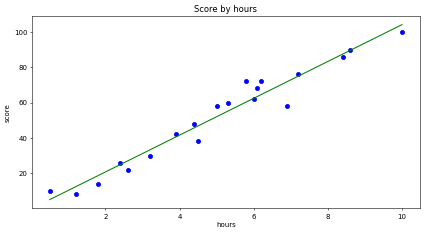

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

y_pred = reg.predict(X) #X를 가지고 결과를 예측해서 y_pred에 넣기
y_pred #예측한 값

plt.figure(figsize=(10, 5), dpi=50)
plt.scatter(X, y, color='blue') # 전체 데이터 20개
plt.plot(X, y_pred, color='green') #plot(직선그래프)
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()